In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [137]:
data = pd.read_csv(r"C:\Users\Usuario\Downloads\fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv")

print(data)

                 ID        Date Element  Data_Value
0       USW00094889  2014-11-12    TMAX          22
1       USC00208972  2009-04-29    TMIN          56
2       USC00200032  2008-05-26    TMAX         278
3       USC00205563  2005-11-11    TMAX         139
4       USC00200230  2014-02-27    TMAX        -106
...             ...         ...     ...         ...
165080  USC00205822  2015-06-09    TMAX         256
165081  USC00205822  2009-10-06    TMAX         167
165082  USC00205050  2014-07-14    TMAX         283
165083  USC00200230  2006-11-29    TMIN         117
165084  USC00207312  2006-09-04    TMIN         111

[165085 rows x 4 columns]


In [138]:
# Convertir la columna 'date' a formato datetime
data['Date'] = pd.to_datetime(data['Date'])

# Filtrar los datos para el período 2005-2015
data = data[(data['Date'] >= '2005-01-01') & (data['Date'] <= '2015-12-31')]

# Eliminar los días bisiestos
data = data[~((data['Date'].dt.month == 2) & (data['Date'].dt.day == 29))]

print(data)


                 ID       Date Element  Data_Value
0       USW00094889 2014-11-12    TMAX          22
1       USC00208972 2009-04-29    TMIN          56
2       USC00200032 2008-05-26    TMAX         278
3       USC00205563 2005-11-11    TMAX         139
4       USC00200230 2014-02-27    TMAX        -106
...             ...        ...     ...         ...
165080  USC00205822 2015-06-09    TMAX         256
165081  USC00205822 2009-10-06    TMAX         167
165082  USC00205050 2014-07-14    TMAX         283
165083  USC00200230 2006-11-29    TMIN         117
165084  USC00207312 2006-09-04    TMIN         111

[165002 rows x 4 columns]


In [139]:
# Filtrar datos de temperatura (asumiendo que 'TMAX' y 'TMIN' son los elementos)
temperature_data = data[data['Element'].isin(['TMAX', 'TMIN'])]

# Giro de los datos para tener 'Fecha' como índice y 'Elemento' como columnas
temperature_pivot = temperature_data.pivot_table(index='Date', columns='Element', values='Data_Value')

# Calculo de las temperaturas máximas y mínimas de cada día.
records = temperature_pivot.groupby(temperature_pivot.index.date).agg(['max', 'min'])
records.columns = records.columns.droplevel(0)

print (temperature_pivot)
print (records.columns)

Element           TMAX       TMIN
Date                             
2005-01-01  108.600000 -33.095238
2005-01-02   83.047619 -16.421053
2005-01-03   85.250000   8.380952
2005-01-04   24.315789  -4.450000
2005-01-05    7.450000 -47.714286
...                ...        ...
2015-12-27   63.555556  15.842105
2015-12-28   33.833333 -18.315789
2015-12-29   59.277778 -10.777778
2015-12-30   36.058824  -3.235294
2015-12-31    3.117647 -18.055556

[4015 rows x 2 columns]
Index(['max', 'min', 'max', 'min'], dtype='object')


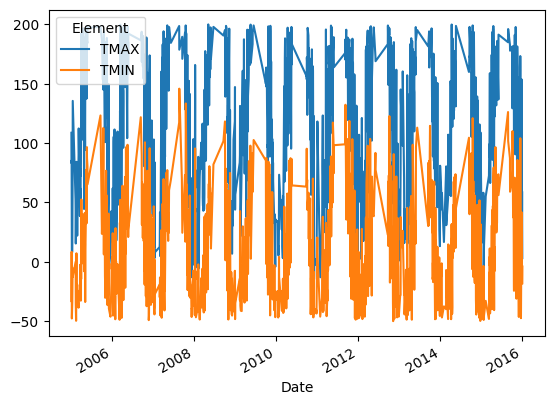

                   max         min        max        min
2005-01-01  108.600000  108.600000 -33.095238 -33.095238
2005-01-02   83.047619   83.047619 -16.421053 -16.421053
2005-01-03   85.250000   85.250000   8.380952   8.380952
2005-01-04   24.315789   24.315789  -4.450000  -4.450000
2005-01-05    7.450000    7.450000 -47.714286 -47.714286
...                ...         ...        ...        ...
2015-12-27   63.555556   63.555556  15.842105  15.842105
2015-12-28   33.833333   33.833333 -18.315789 -18.315789
2015-12-29   59.277778   59.277778 -10.777778 -10.777778
2015-12-30   36.058824   36.058824  -3.235294  -3.235294
2015-12-31    3.117647    3.117647 -18.055556 -18.055556

[1529 rows x 4 columns]


In [147]:
# Crear un gráfico de línea 
import matplotlib.pyplot as plt
temperature_pivot.plot()
plt.show()

# Agrupar por fecha y calcular máximos y mínimos
records = temperature_pivot.groupby(temperature_pivot.index.date).agg(['max', 'min'])
records.columns = records.columns.droplevel(0)

print(records)

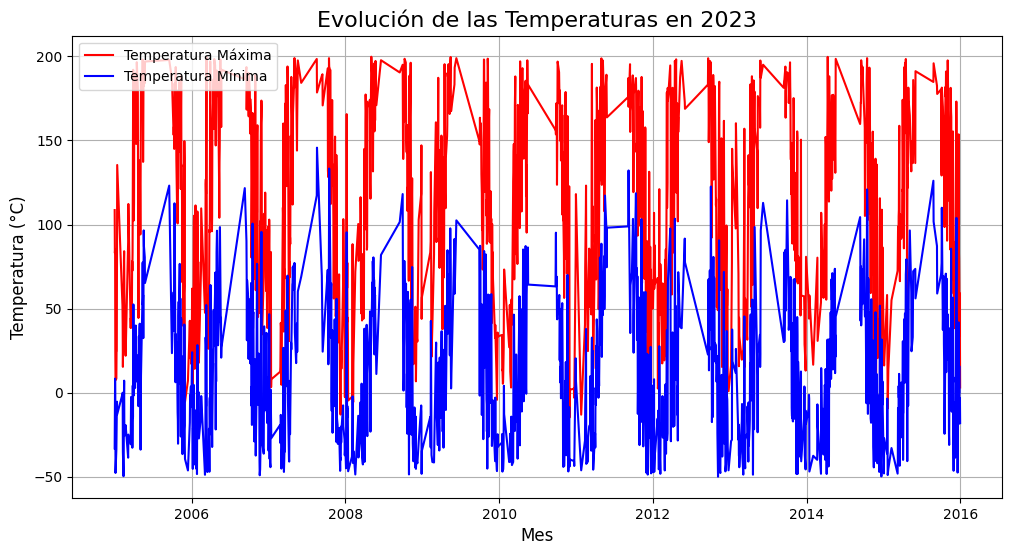

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=temperature_pivot, x=temperature_pivot.index, y='TMAX', label='Temperatura Máxima', color='red')
sns.lineplot(data=temperature_pivot, x=temperature_pivot.index, y='TMIN', label='Temperatura Mínima', color='blue')

plt.title('Evolución de las Temperaturas en 2023', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Temperatura (°C)', fontsize=12)
plt.grid(True)
plt.legend(loc='upper left')

plt.show()